In [2]:
import pandas as pd
import dtale
import datetime

%matplotlib inline

In [15]:
from pandas.tseries.holiday import USFederalHolidayCalendar
cal = USFederalHolidayCalendar()
holidays = cal.holidays(start='2014-01-01', end='2022-12-31')

In [16]:
holidays

DatetimeIndex(['2014-01-01', '2014-01-20', '2014-02-17', '2014-05-26',
               '2014-07-04', '2014-09-01', '2014-10-13', '2014-11-11',
               '2014-11-27', '2014-12-25', '2015-01-01', '2015-01-19',
               '2015-02-16', '2015-05-25', '2015-07-03', '2015-09-07',
               '2015-10-12', '2015-11-11', '2015-11-26', '2015-12-25',
               '2016-01-01', '2016-01-18', '2016-02-15', '2016-05-30',
               '2016-07-04', '2016-09-05', '2016-10-10', '2016-11-11',
               '2016-11-24', '2016-12-26', '2017-01-02', '2017-01-16',
               '2017-02-20', '2017-05-29', '2017-07-04', '2017-09-04',
               '2017-10-09', '2017-11-10', '2017-11-23', '2017-12-25',
               '2018-01-01', '2018-01-15', '2018-02-19', '2018-05-28',
               '2018-07-04', '2018-09-03', '2018-10-08', '2018-11-12',
               '2018-11-22', '2018-12-25', '2019-01-01', '2019-01-21',
               '2019-02-18', '2019-05-27', '2019-07-04', '2019-09-02',
      

In [7]:
data_import = pd.read_csv('/Users/sitanshurupani/Data Science Coursework/Sem 4/GQP - National Parks/DataSpell Project/Data/All_Years_Weather_Merged.csv')

In [8]:
dtale.show(data_import)

In [9]:
def agg_metrics(x):
    d = {}
    d['value'] = x['Value'].sum()
    d['temp'] = x['temp'].mean()
    d['temp_min'] = x['temp_min'].min()
    d['temp_max'] = x['temp_max'].max()
    d['pressure'] = x['pressure'].mean()
    d['humidity'] = x['humidity'].mean()
    d['wind_speed'] = x['wind_speed'].mean()
    d['wind_gust'] = x['wind_gust'].mean()
    d['rain_1h'] = x['rain_1h'].sum()
    d['snow_1h'] = x['snow_1h'].sum()
    return pd.Series(d, index=['value', 'temp', 'temp_min', 'temp_max', 'pressure', 'humidity', 'wind_speed', 'wind_gust', 'rain_1h', 'snow_1h'])

In [9]:
# data_import.groupby(['Full_Date']).aggregate({'Value': ['sum'], 'temp': ['mean'], 'feels_like': ['mean'], 'temp_min': ['min'], 'temp_max': ['max']})

,Value,temp,feels_like,temp_min,temp_max
,sum,mean,mean,min,max
Full_Date,,,,,
2019-05-01,208,44.220833,39.512500,26.62,58.68
2019-05-02,229,41.864400,39.723200,35.60,55.29
2019-05-03,189,43.672400,41.592800,39.38,52.09
2019-05-04,599,44.644848,43.802424,39.31,63.68
2019-05-05,536,50.456250,49.199167,39.61,69.19
...,...,...,...,...,...
2021-10-27,591,47.426800,41.343600,43.41,52.61
2021-10-28,1551,47.634583,42.338750,40.08,54.81


In [10]:
daily_slice_df = data_import.groupby('Full_Date').apply(agg_metrics)
daily_slice_df.head()

,value,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain_1h,snow_1h
Full_Date,,,,,,,,,,
2019-05-01,208.0,44.220833,26.62,58.68,1027.750000,36.666667,6.969583,9.944444,0.00,0.0
2019-05-02,229.0,41.864400,35.60,55.29,1024.320000,78.920000,3.918400,6.682727,4.74,0.0
2019-05-03,189.0,43.672400,39.38,52.09,1021.960000,81.840000,4.082800,7.334762,3.97,0.0
2019-05-04,599.0,44.644848,39.31,63.68,1014.424242,89.545455,2.724242,4.378966,10.40,0.0
2019-05-05,536.0,50.456250,39.61,69.19,1012.791667,76.333333,3.331667,5.573333,0.00,0.0


In [25]:
daily_attendance = daily_slice_df
daily_attendance.index = pd.to_datetime(daily_attendance.index)
daily_attendance['Holiday_flag'] = daily_attendance.index.isin(holidays)

In [27]:
daily_attendance

,value,temp,temp_min,temp_max,pressure,humidity,wind_speed,wind_gust,rain_1h,snow_1h,Holiday_flag
Full_Date,,,,,,,,,,,
2019-05-01,208.0,44.220833,26.62,58.68,1027.750000,36.666667,6.969583,9.944444,0.00,0.0,False
2019-05-02,229.0,41.864400,35.60,55.29,1024.320000,78.920000,3.918400,6.682727,4.74,0.0,False
2019-05-03,189.0,43.672400,39.38,52.09,1021.960000,81.840000,4.082800,7.334762,3.97,0.0,False
2019-05-04,599.0,44.644848,39.31,63.68,1014.424242,89.545455,2.724242,4.378966,10.40,0.0,False
2019-05-05,536.0,50.456250,39.61,69.19,1012.791667,76.333333,3.331667,5.573333,0.00,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...
2021-10-27,591.0,47.426800,43.41,52.61,1006.520000,82.480000,15.878800,24.278800,16.49,0.0,False
2021-10-28,1551.0,47.634583,40.08,54.81,1012.625000,68.041667,14.502500,21.000417,0.25,0.0,False
2021-10-29,1519.0,44.892917,33.60,56.43,1015.333333,74.000000,6.156667,8.826087,0.00,0.0,False


In [64]:
seasonality_test_df = daily_slice_df[['value']]
seasonality_test_df.index = pd.to_datetime(seasonality_test_df.index)
seasonality_test_df = seasonality_test_df[seasonality_test_df.index < '2020-01-01']
seasonality_test_df.head()

,value
Full_Date,
2019-05-01,208.0
2019-05-02,229.0
2019-05-03,189.0
2019-05-04,599.0
2019-05-05,536.0


<AxesSubplot:xlabel='Full_Date'>

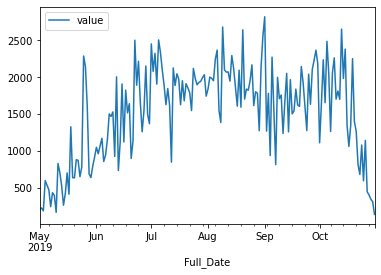

In [65]:
seasonality_test_df.plot()

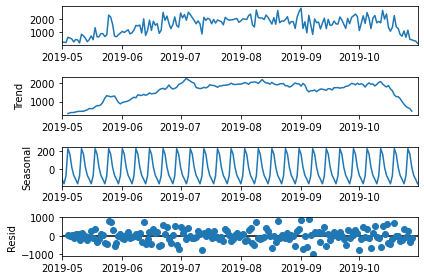

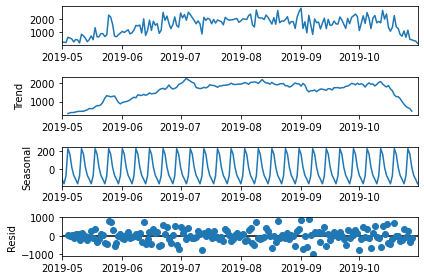

In [112]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(seasonality_test_df)
result.plot()

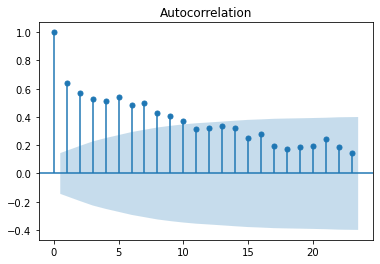

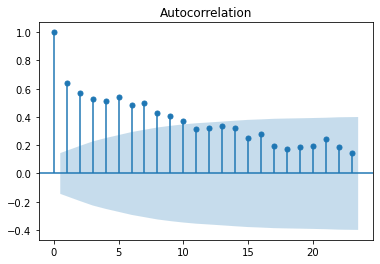

In [67]:
from statsmodels.graphics.tsaplots import plot_acf
plot_acf(seasonality_test_df)

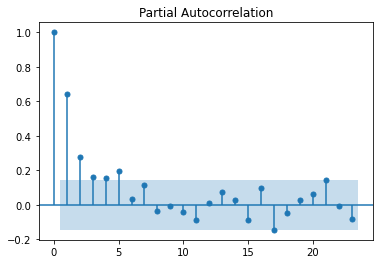

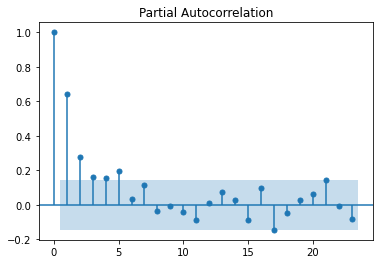

In [71]:
from statsmodels.graphics.tsaplots import plot_pacf
plot_pacf(seasonality_test_df)

In [72]:
from statsmodels.tsa.stattools import adfuller
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(seasonality_test_df)
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -1.5953130460793061
ADF p-values: 0.4859474837050962
ADF number of lags used: 6
ADF number of observations: 177
ADF critical values: {'1%': -3.467845319799907, '5%': -2.878011745497439, '10%': -2.575551186759871}
ADF best information criterion: 2543.9173666069605


<AxesSubplot:xlabel='Full_Date'>

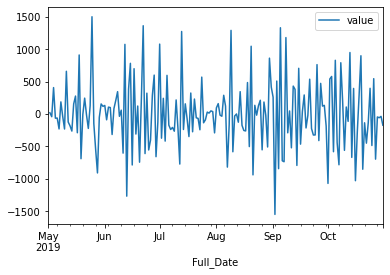

In [73]:
prev_seasonality_test_df = seasonality_test_df.shift()
differenced_p = seasonality_test_df - prev_seasonality_test_df
differenced_p.plot()

In [74]:
adf, pval, usedlag, nobs, crit_vals, icbest =  adfuller(differenced_p.dropna())
print('ADF test statistic:', adf)
print('ADF p-values:', pval)
print('ADF number of lags used:', usedlag)
print('ADF number of observations:', nobs)
print('ADF critical values:', crit_vals)
print('ADF best information criterion:', icbest)

ADF test statistic: -9.07115100521925
ADF p-values: 4.298739144284444e-15
ADF number of lags used: 5
ADF number of observations: 177
ADF critical values: {'1%': -3.467845319799907, '5%': -2.878011745497439, '10%': -2.575551186759871}
ADF best information criterion: 2530.572299536587


In [104]:
hourly_slice_df = data_import
hourly_slice_df['datetime_fmt'] = pd.to_datetime(data_import['Full_Date'] + ' ' + data_import['Time'])

In [105]:
hourly_slice_df = hourly_slice_df[['datetime_fmt', 'Value']]

In [106]:
hourly_slice_df.index = pd.to_datetime(hourly_slice_df['datetime_fmt'])
hourly_slice_df.drop('datetime_fmt',1, inplace=True)
hourly_slice_df = hourly_slice_df[hourly_slice_df.index < '2020-01-01 00:00:00']

/Library/anaconda3/envs/ds_env/lib/python3.9/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [107]:
hourly_slice_df.head()

,Value
datetime_fmt,
2019-05-01 00:00:00,0
2019-05-01 01:00:00,0
2019-05-01 02:00:00,1
2019-05-01 03:00:00,0
2019-05-01 04:00:00,0


<AxesSubplot:xlabel='datetime_fmt'>

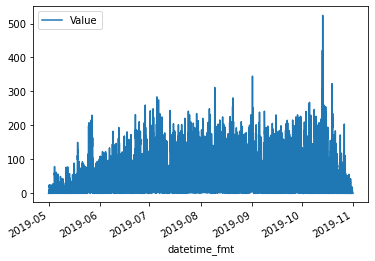

In [108]:
hourly_slice_df.plot()

In [110]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(hourly_slice_df)
result.plot()

ValueError: You must specify a period or x must be a pandas object with a DatetimeIndex with a freq not set to None